In [44]:
from tensorflow.keras.layers import Input,Conv2D,Concatenate
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense,BatchNormalization,Dropout,AveragePooling2D,Activation,GlobalAveragePooling2D
from tensorflow.keras import Model
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
!unzip '/content/drive/MyDrive/Maize.zip' -d '/content/drive/MyDrive/Maize'

Archive:  /content/drive/MyDrive/Maize.zip
   creating: /content/drive/MyDrive/Maize/Maize/
   creating: /content/drive/MyDrive/Maize/Maize/train/
   creating: /content/drive/MyDrive/Maize/Maize/train/Blight/
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (1).jpeg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (1).jpg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (10).jpg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (100).jpg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (101).jpg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (102).jpg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (103).jpg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (104).jpg  
  inflating: /content/drive/MyDrive/Maize/Maize/train/Blight/Corn_Blight (105).jpg  
  inflating: /content/drive/My

In [48]:
!ls '/content/drive/MyDrive/Maize/Maize/train'

 Blight  'Common Rust'	'Gray Leaf Spot'   Healthy


In [49]:
!ls '/content/drive/MyDrive/Maize/Maize/val'

 Blight  'Common Rust'	'Gray Leaf Spot'   Healthy


In [50]:
dataset_path_train = os.listdir('/content/drive/MyDrive/Maize/Maize/train')

In [51]:
dataset_path_validation = os.listdir('/content/drive/MyDrive/Maize/Maize/val')

In [52]:
disease_items_train=[]

for item in dataset_path_train:
  all_disease = os.listdir('/content/drive/MyDrive/Maize/Maize/train' +'/'+item)
  for disease in all_disease:
    disease_items_train.append((item , str('/content/drive/MyDrive/Maize/Maize/train'+'/'+item ) +'/'+disease ))

In [53]:
train_disease_df = pd.DataFrame(data=disease_items_train,columns = ['Train_Disease_Type' ,'Train_Disease_Image'])
train_disease_df.head()

,Train_Disease_Type,Train_Disease_Image
0,Blight,/content/drive/MyDrive/Maize/Maize/train/Bligh...
1,Blight,/content/drive/MyDrive/Maize/Maize/train/Bligh...
2,Blight,/content/drive/MyDrive/Maize/Maize/train/Bligh...
3,Blight,/content/drive/MyDrive/Maize/Maize/train/Bligh...
4,Blight,/content/drive/MyDrive/Maize/Maize/train/Bligh...


In [54]:
disease_items_test=[]

for item in dataset_path_validation:
  all_disease = os.listdir('/content/drive/MyDrive/Maize/Maize/val' +'/'+item)
  for disease in all_disease:
    disease_items_test.append((item , str('/content/drive/MyDrive/Maize/Maize/val'+'/'+item ) +'/'+disease ))

In [55]:
test_disease_df = pd.DataFrame(data=disease_items_test,columns = ['Test_Disease_Type' ,'Test_Disease_Image'])
test_disease_df.head()

,Test_Disease_Type,Test_Disease_Image
0,Blight,/content/drive/MyDrive/Maize/Maize/val/Blight/...
1,Blight,/content/drive/MyDrive/Maize/Maize/val/Blight/...
2,Blight,/content/drive/MyDrive/Maize/Maize/val/Blight/...
3,Blight,/content/drive/MyDrive/Maize/Maize/val/Blight/...
4,Blight,/content/drive/MyDrive/Maize/Maize/val/Blight/...


In [56]:
img_width = 224
img_height = 224
train_images = []
train_labels = []
path = '/content/drive/MyDrive/Maize/Maize/train/'
for i in dataset_path_train:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'/'+f)
    img = cv2.resize(img,(img_width,img_height))
    train_images.append(img)
    train_labels.append(i)

In [57]:
img_width = 224
img_height = 224
test_images = []
test_labels = []

path = '/content/drive/MyDrive/Maize/Maize/val/'
for i in dataset_path_validation:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'/'+f)
    img = cv2.resize(img,(img_width,img_height))
    test_images.append(img)
    test_labels.append(i)

In [58]:
train_labels = np.array(train_labels)
print(train_labels)

['Blight' 'Blight' 'Blight' ... 'Healthy' 'Healthy' 'Healthy']


In [59]:
test_labels = np.array(test_labels)
print(test_labels)

['Blight' 'Blight' 'Blight' ... 'Healthy' 'Healthy' 'Healthy']


In [60]:
print(len(train_labels))

3034


In [61]:
print(len(test_labels))

1019


In [62]:
x_train = np.array(train_images)
x_train = x_train.astype('float32')/255.0
x_train.shape

(3034, 224, 224, 3)

In [63]:
x_test = np.array(test_images)
x_test = x_test.astype('float32')/255.0
x_test.shape

(1019, 224, 224, 3)

In [64]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_train = train_disease_df['Train_Disease_Type'].values
y_test = test_disease_df['Test_Disease_Type'].values

In [65]:
le =  LabelEncoder()

y_train = le.fit_transform(y_train)       #Label encoding for traditional Machine Leanring algorithms
y_train_one_hot = to_categorical(y_train) # One Hot Encoding for deep learning algorithms

y_test = le.fit_transform(y_test)         #Label encoding for traditional Machine Leanring algorithms
y_test_one_hot = to_categorical(y_test)   # One Hot Encoding for deep learning algorithms

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(3034, 224, 224, 3)
(1019, 224, 224, 3)
(3034, 4)
(1019, 4)


# **Convolutional Block**

In [67]:
def conv_with_Batch_Normalisation(prev_layer , nbr_kernels , filter_Size , strides =(1,1) , padding = 'same'):
    x = Conv2D(filters=nbr_kernels, kernel_size = filter_Size, strides=strides , padding=padding)(prev_layer)
    x = BatchNormalization(axis=3)(x) #If the dimension is [height, width, channel] then the axis is 3.
    x = Activation(activation='relu')(x)
    return x

# **STEM Block**

In [68]:
def StemBlock(prev_layer):
    x = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 32, filter_Size=(3,3) , strides=(2,2))
    x = conv_with_Batch_Normalisation(x, nbr_kernels = 32, filter_Size=(3,3))
    x = conv_with_Batch_Normalisation(x, nbr_kernels = 64, filter_Size=(3,3))
    x = MaxPool2D(pool_size=(3,3) , strides=(2,2)) (x)
    x = conv_with_Batch_Normalisation(x, nbr_kernels = 80, filter_Size=(1,1))
    x = conv_with_Batch_Normalisation(x, nbr_kernels = 192, filter_Size=(3,3))
    x = MaxPool2D(pool_size=(3,3) , strides=(2,2)) (x)
    
    return x    

# **Inception Block B**

In [69]:
def InceptionBlock_A(prev_layer  , nbr_kernels):
    
    branch1 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 64, filter_Size = (1,1))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels=96, filter_Size=(3,3))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels=96, filter_Size=(3,3))
    
    branch2 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels=48, filter_Size=(1,1))
    branch2 = conv_with_Batch_Normalisation(branch2, nbr_kernels=64, filter_Size=(3,3)) # may be 3*3
    
    branch3 = AveragePooling2D(pool_size=(3,3) , strides=(1,1) , padding='same') (prev_layer)
    branch3 = conv_with_Batch_Normalisation(branch3, nbr_kernels = nbr_kernels, filter_Size = (1,1))
    
    branch4 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels=64, filter_Size=(1,1))
    
    output = tf.concat([branch1 , branch2 , branch3 , branch4], axis=3)
    
    return output

# **Inception Block B**

In [70]:
def InceptionBlock_B(prev_layer , nbr_kernels):
    
    branch1 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = nbr_kernels, filter_Size = (1,1))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = nbr_kernels, filter_Size = (7,1))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = nbr_kernels, filter_Size = (1,7))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = nbr_kernels, filter_Size = (7,1))    
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 192, filter_Size = (1,7))
    
    branch2 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = nbr_kernels, filter_Size = (1,1))
    branch2 = conv_with_Batch_Normalisation(branch2, nbr_kernels = nbr_kernels, filter_Size = (1,7))
    branch2 = conv_with_Batch_Normalisation(branch2, nbr_kernels = 192, filter_Size = (7,1))
    
    branch3 = AveragePooling2D(pool_size=(3,3) , strides=(1,1) , padding ='same') (prev_layer)
    branch3 = conv_with_Batch_Normalisation(branch3, nbr_kernels = 192, filter_Size = (1,1))
    
    branch4 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 192, filter_Size = (1,1))
    
    output = tf.concat([branch1 , branch2 , branch3 , branch4], axis = 3)
    
    return output    

# **Inception Block C**

In [71]:
def InceptionBlock_C(prev_layer):
    
    branch1 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 448, filter_Size = (1,1))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 384, filter_Size = (3,3))
    branch1_1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 384, filter_Size = (1,3))    
    branch1_2 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 384, filter_Size = (3,1))
    branch1 = tf.concat([branch1_1 , branch1_2], axis = 3)
    
    branch2 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 384, filter_Size = (1,1))
    branch2_1 = conv_with_Batch_Normalisation(branch2, nbr_kernels = 384, filter_Size = (1,3))
    branch2_2 = conv_with_Batch_Normalisation(branch2, nbr_kernels = 384, filter_Size = (3,1))
    branch2 = tf.concat([branch2_1 , branch2_2], axis = 3)
    
    branch3 = MaxPool2D(pool_size=(3,3) , strides=(1,1) , padding='same')(prev_layer)
    branch3 = conv_with_Batch_Normalisation(branch3, nbr_kernels = 192, filter_Size = (1,1))
    
    branch4 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 320, filter_Size = (1,1))
    
    output = tf.concat([branch1 , branch2 , branch3 , branch4], axis = 3)
    
    return output

# **Reduction Block A**

In [72]:
def ReductionBlock_A(prev_layer):
    
    branch1 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 64, filter_Size = (1,1))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 96, filter_Size = (3,3))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 96, filter_Size = (3,3) , strides=(2,2) ) #, padding='valid'
    
    branch2 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 384, filter_Size=(3,3) , strides=(2,2) )
    
    branch3 = MaxPool2D(pool_size=(3,3) , strides=(2,2) , padding='same')(prev_layer)
    
    output = tf.concat([branch1 , branch2 , branch3], axis = 3)
    
    return output

# **Reduction Block B**

In [73]:
def ReductionBlock_B(prev_layer):
    
    branch1 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 192, filter_Size = (1,1))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 192, filter_Size = (1,7))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 192, filter_Size = (7,1))
    branch1 = conv_with_Batch_Normalisation(branch1, nbr_kernels = 192, filter_Size = (3,3) , strides=(2,2) , padding = 'valid')
    
    branch2 = conv_with_Batch_Normalisation(prev_layer, nbr_kernels = 192, filter_Size = (1,1) )
    branch2 = conv_with_Batch_Normalisation(branch2, nbr_kernels = 320, filter_Size = (3,3) , strides=(2,2) , padding='valid' )

    branch3 = MaxPool2D(pool_size=(3,3) , strides=(2,2) )(prev_layer)
    
    output = tf.concat([branch1 , branch2 , branch3], axis = 3)
    
    return output

# **Inception V3 Block**

In [75]:
input_layer = Input(shape=(224 , 224 , 3))
    
x = StemBlock(input_layer)

#Inception Block A ---> 3 Times     
x = InceptionBlock_A(prev_layer = x ,nbr_kernels = 32)
x = InceptionBlock_A(prev_layer = x ,nbr_kernels = 64)
x = InceptionBlock_A(prev_layer = x ,nbr_kernels = 64)
    
x = ReductionBlock_A(prev_layer = x )


#Inception Block B ---> 4 Times 
x = InceptionBlock_B(prev_layer = x  , nbr_kernels = 128)
x = InceptionBlock_B(prev_layer = x , nbr_kernels = 160)
x = InceptionBlock_B(prev_layer = x , nbr_kernels = 160)
x = InceptionBlock_B(prev_layer = x , nbr_kernels = 192)
    

    
x = ReductionBlock_B(prev_layer = x)

#Inception Block C ---> 2 Times     
x = InceptionBlock_C(prev_layer = x)
x = InceptionBlock_C(prev_layer = x)
    
x = GlobalAveragePooling2D()(x)
x = Dense(units=2048, activation='relu') (x)
x = Dropout(rate = 0.2) (x)
    
    

feature_extractor = Model(inputs = input_layer , outputs = x  , name = 'Inception-V3')   


# **Inception v3 as feature extractor and XGBoost as classifier**

In [83]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import xgboost as xgb
x_feature_xgboost_train = feature_extractor.predict(x_train)

95/95 [==============================] - 311s 3s/step


In [85]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_feature_xgboost_train , y_train)

XGBClassifier(objective='multi:softprob')

In [86]:
x_feature_xgboost_test = feature_extractor.predict(x_test)
predicted_XGBClassifier = xgb_classifier.predict(x_feature_xgboost_test)
predicted_XGBClassifier = le.inverse_transform(predicted_XGBClassifier)
predicted_XGBClassifier

32/32 [==============================] - 105s 3s/step


array(['Blight', 'Blight', 'Gray Leaf Spot', ..., 'Healthy', 'Healthy',
       'Healthy'], dtype=object)

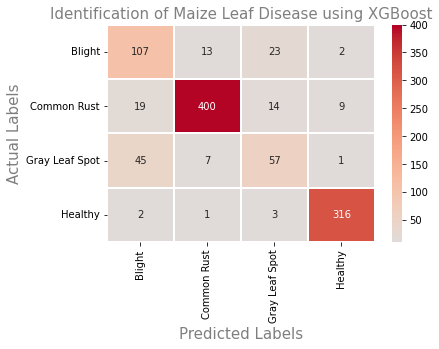

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_XGBClassifier)
vmin = 10
vmax = 400
center = 0
xticklabels= ['Blight' ,'Common Rust','Gray Leaf Spot','Healthy']
yticklabels= ['Blight' ,'Common Rust','Gray Leaf Spot','Healthy']
sns.heatmap(cm, annot=True,linewidth=.8,cmap="coolwarm",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels, fmt='.0f')
font1 = {'size': 15,'alpha':0.5}
font2 = {'size':15,'alpha':0.5}
plt.title("Identification of Maize Leaf Disease using XGBoost",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [98]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predicted_XGBClassifier))
print ("Precision = ", metrics.precision_score(test_labels, predicted_XGBClassifier,average='macro'))
print ("Recall = ", metrics.recall_score(test_labels, predicted_XGBClassifier,average='micro'))
print ("F1 Score = ", metrics.f1_score(test_labels,predicted_XGBClassifier,average='micro'))

Accuracy =  0.8635917566241413
Precision =  0.7799148436994795
Recall =  0.8635917566241413
F1 Score =  0.8635917566241413


# **Inception v3 as feature extractor and LightGBM as classifier**

In [99]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
import lightgbm as lgbm
LightGBM_Classifier = lgbm.LGBMClassifier()

In [101]:
x_feature_LGBMClassifier_train = feature_extractor.predict(x_train)
LightGBM_Classifier.fit(x_feature_LGBMClassifier_train , y_train)

95/95 [==============================] - 314s 3s/step


LGBMClassifier()

In [102]:
x_feature_LGBMClassifier_test = feature_extractor.predict(x_test)
predicted_LGBMClassifier = LightGBM_Classifier.predict(x_feature_LGBMClassifier_test)
predicted_LGBMClassifier = le.inverse_transform(predicted_LGBMClassifier)
predicted_LGBMClassifier

32/32 [==============================] - 106s 3s/step


array(['Blight', 'Blight', 'Blight', ..., 'Healthy', 'Healthy', 'Healthy'],
      dtype=object)

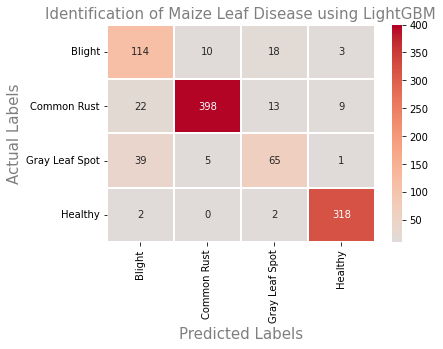

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_LGBMClassifier)
vmin = 10
vmax = 400
center = 0
xticklabels= ['Blight' ,'Common Rust','Gray Leaf Spot','Healthy']
yticklabels= ['Blight' ,'Common Rust','Gray Leaf Spot','Healthy']
sns.heatmap(cm, annot=True,linewidth=.8,cmap="coolwarm",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels, fmt='.0f')
font1 = {'size': 15,'alpha':0.5}
font2 = {'size':15,'alpha':0.5}
plt.title("Identification of Maize Leaf Disease using LightGBM",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [104]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predicted_LGBMClassifier))
print ("Precision = ", metrics.precision_score(test_labels, predicted_LGBMClassifier,average='macro'))
print ("Recall = ", metrics.recall_score(test_labels, predicted_LGBMClassifier,average='micro'))
print ("F1 Score = ", metrics.f1_score(test_labels,predicted_LGBMClassifier,average='micro'))

Accuracy =  0.8783120706575074
Precision =  0.80793464141763
Recall =  0.8783120706575074
F1 Score =  0.8783120706575074


# **Inception v3 as feature extractor and CatBoost as classifier**

In [105]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 15.1 MB/s eta 0:00:00


In [106]:
import catboost as cbt
CatBoost_Classifier =cbt.CatBoostClassifier()

In [107]:
x_feature_CatBoost_Classifier_train = feature_extractor.predict(x_train)

95/95 [==============================] - 309s 3s/step


In [108]:
CatBoost_Classifier.fit(x_feature_CatBoost_Classifier_train , y_train)

Learning rate set to 0.083735
0:	learn: 1.2865396	total: 1.24s	remaining: 20m 41s
1:	learn: 1.2030899	total: 1.85s	remaining: 15m 21s
2:	learn: 1.1399603	total: 2.49s	remaining: 13m 48s
3:	learn: 1.0856605	total: 3.47s	remaining: 14m 23s
4:	learn: 1.0323690	total: 4.43s	remaining: 14m 41s
5:	learn: 0.9870422	total: 5.36s	remaining: 14m 47s
6:	learn: 0.9464895	total: 5.93s	remaining: 14m 1s
7:	learn: 0.9068788	total: 6.55s	remaining: 13m 31s
8:	learn: 0.8717231	total: 7.15s	remaining: 13m 7s
9:	learn: 0.8421896	total: 7.72s	remaining: 12m 44s
10:	learn: 0.8133754	total: 8.33s	remaining: 12m 28s
11:	learn: 0.7887329	total: 8.91s	remaining: 12m 13s
12:	learn: 0.7651604	total: 9.51s	remaining: 12m 1s
13:	learn: 0.7435754	total: 10.1s	remaining: 11m 50s
14:	learn: 0.7248173	total: 10.7s	remaining: 11m 41s
15:	learn: 0.7026277	total: 11.3s	remaining: 11m 34s
16:	learn: 0.6854175	total: 11.9s	remaining: 11m 26s
17:	learn: 0.6684519	total: 12.5s	remaining: 11m 19s
18:	learn: 0.6526490	total: 1

In [115]:
x_feature_CatBoost_Classifier_test = feature_extractor.predict(x_test)
predicted_CatBoost_Classifier = CatBoost_Classifier.predict(x_feature_CatBoost_Classifier_test)
predicted_CatBoost_Classifier = np.ravel(predicted_CatBoost_Classifier) #https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
predicted_CatBoost_Classifier

32/32 [==============================] - 105s 3s/step


array([0, 0, 0, ..., 3, 3, 3])

In [116]:
predicted_CatBoost_Classifier = le.inverse_transform(predicted_CatBoost_Classifier)
predicted_CatBoost_Classifier

array(['Blight', 'Blight', 'Blight', ..., 'Healthy', 'Healthy', 'Healthy'],
      dtype=object)

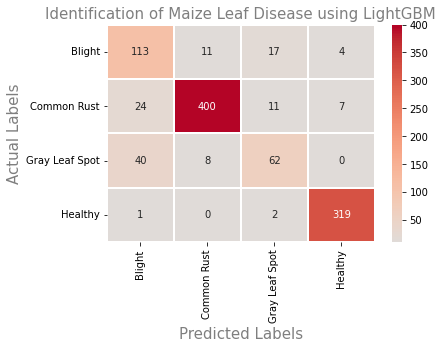

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_CatBoost_Classifier)
vmin = 10
vmax = 400
center = 0
xticklabels= ['Blight' ,'Common Rust','Gray Leaf Spot','Healthy']
yticklabels= ['Blight' ,'Common Rust','Gray Leaf Spot','Healthy']
sns.heatmap(cm, annot=True,linewidth=.8,cmap="coolwarm",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels, fmt='.0f')
font1 = {'size': 15,'alpha':0.5}
font2 = {'size':15,'alpha':0.5}
plt.title("Identification of Maize Leaf Disease using LightGBM",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [120]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predicted_CatBoost_Classifier))
print ("Precision = ", metrics.precision_score(test_labels, predicted_CatBoost_Classifier,average='macro'))
print ("Recall = ", metrics.recall_score(test_labels, predicted_CatBoost_Classifier,average='micro'))
print ("F1 Score = ", metrics.f1_score(test_labels,predicted_CatBoost_Classifier,average='micro'))

Accuracy =  0.8773307163886163
Precision =  0.8075162771916448
Recall =  0.8773307163886163
F1 Score =  0.8773307163886163
